In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [4]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<Axes: ylabel='Age'>

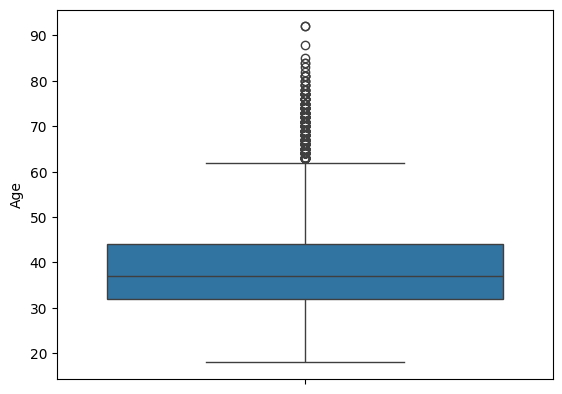

In [5]:
sns.boxplot(dataset['Age'])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

In [7]:
dataset = dataset.drop(['RowNumber','CustomerId','Surname'],axis = 1)

In [8]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
from sklearn.preprocessing import LabelEncoder

Label_encoder = LabelEncoder()
dataset['Gender'] = Label_encoder.fit_transform(dataset['Gender'])

In [10]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [11]:
dataset['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
geo_encoder = onehot_encoder.fit_transform(dataset[['Geography']])


In [13]:
geo_encoder.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [14]:
onehot_encoder.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [15]:
geo_encoded_df = pd.DataFrame(geo_encoder.toarray(), columns = onehot_encoder.get_feature_names_out(['Geography']))

In [16]:
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [17]:
dataset = pd.concat([dataset.drop('Geography', axis =1 ),geo_encoded_df],axis = 1)

In [18]:
dataset

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [19]:
## save the encoder
with open('label_encoder.pkl','wb') as file:
    pickle.dump(Label_encoder,file)

with open('onehot_Encoder.pk1','wb') as file:
    pickle.dump(onehot_encoder,file)


In [20]:
x = dataset.drop(['Exited'], axis =1)
y = dataset['Exited']


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
with open('Standard_Scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

##### ANN Implementation


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime



In [24]:
x_train.shape[1]

12

In [25]:
## Build our ANN Model
model = Sequential(
    [
        Dense(64,activation='relu',input_shape=(x_train.shape[1],)), # HL1
 
        Dense(32,activation='relu'),  # HL2
        Dense(1,activation='sigmoid') # Output Layer

    ]
)

c:\Users\mrinm\OneDrive\Desktop\Folder Head\ML\Gen-AI Udemy Course\ANN-Churn-Modelling\churn\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
import tensorflow
opt =  tensorflow.keras.optimizers.Adam(learning_rate = 0.01)
loss = tensorflow.keras.losses.BinaryCrossentropy()
loss

<LossFunctionWrapper(<function binary_crossentropy at 0x0000024E9465CF40>, kwargs={'from_logits': False, 'label_smoothing': 0.0, 'axis': -1})>

In [30]:
## Compile the model

model.compile(optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
## Set up the tensor board

log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorflow_callback = TensorBoard(log_dir = log_dir,histogram_freq = 1)

In [35]:
## Set up Early Stopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 10,restore_best_weights=True)


In [36]:
# Training the model

history = model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs =100, callbacks=[tensorflow_callback,early_stopping_callback])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8534 - loss: 0.3604 - val_accuracy: 0.8545 - val_loss: 0.3508
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8570 - loss: 0.3502 - val_accuracy: 0.8555 - val_loss: 0.3628
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8533 - loss: 0.3469 - val_accuracy: 0.8590 - val_loss: 0.3431
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8590 - loss: 0.3426 - val_accuracy: 0.8615 - val_loss: 0.3457
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8599 - loss: 0.3402 - val_accuracy: 0.8600 - val_loss: 0.3443
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8614 - loss: 0.3368 - val_accuracy: 0.8625 - val_loss: 0.3414
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8619 - loss: 0.3330 - val_accuracy: 0.8575 - val_loss: 0.3422
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8631 - loss: 0.3340 - val_accu

In [37]:
model.save('model.h5')

In [38]:
# Load TensorBoard extension

%load_ext tensorboard

In [42]:
%tensorboard --logdir logs/fit20250809-112032

Reusing TensorBoard on port 6008 (pid 27996), started 0:00:40 ago. (Use '!kill 27996' to kill it.)